# **Analyzing Uber Drives of 2016**



## **Introduction**
In today's fast-paced business environment, understanding travel patterns can significantly enhance operational efficiency and resource management. We embarked on a comprehensive analysis of a dataset documenting Uber Drives activities for the year 2016. This dataset includes details about travel start and end dates, categories, start and stop locations, distances covered, and purposes of travel. Our objective was to extract meaningful insights from this data, helping us uncover trends and patterns that could be benficial for predicting future Uber rides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
uber_df = pd.read_csv("uber_drives.csv")
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
uber_df.columns = uber_df.columns.str.replace('*', '').str.lower()

In [4]:
uber_df.dtypes

start_date     object
end_date       object
category       object
start          object
stop           object
miles         float64
purpose        object
dtype: object

## **Data Preprocessing**
The first step in our analysis was to preprocess the data, ensuring it was clean and ready for analysis. This involved several key tasks:

Handling Missing Values: Missing values can obscure patterns in the data and lead to incorrect conclusions. We addressed missing values in our dataset by filling them based on the context or using appropriate imputation techniques.

Feature Engineering: To derive more value from the data, we created new features. These included:



*   Extracting Months and Year: We extracted the month and year from the start date field to analyze trends over time.
*   Calculating Duration: We calculated the duration of each trip by finding the difference between end time and start time.
*   Removing Outliers: To ensure the accuracy of our analysis, we identified and removed outliers in the miles column. This step helped in maintaining the integrity of the data and avoiding skewed results due to extreme values.








In [5]:
uber_df.isna().sum()

start_date      0
end_date        1
category        1
start           1
stop            1
miles           0
purpose       503
dtype: int64

In [6]:
uber_df_new = uber_df
uber_df_new = uber_df_new.fillna("Unknown")
uber_df = uber_df_new

In [7]:
uber_df.isna().any()

start_date    False
end_date      False
category      False
start         False
stop          False
miles         False
purpose       False
dtype: bool

In [8]:
uber_df[["start",'stop']] = uber_df[["start",'stop']].replace({"Kar?chi": "Karachi"})
uber_df[["start",'stop']] = uber_df[["start",'stop']].replace({"Unknown": "Unknown Location"})
uber_df["purpose"] = uber_df["purpose"].replace({"Unknown": "Unknown Purpose"})

In [9]:
uber_df = uber_df.drop_duplicates()
uber_df

,start_date,end_date,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [10]:
uber_df.nunique()

start_date    1155
end_date      1155
category         3
start          176
stop           187
miles          257
purpose         11
dtype: int64

In [11]:
uber_df.describe()

,miles
count,1155.000000
mean,21.125108
std,359.454497
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
uber_df.describe(include = 'object')

,start_date,end_date,category,start,stop,purpose
count,1155,1155,1155,1155,1155,1155
unique,1155,1155,3,176,187,11
top,1/1/2016 21:11,1/1/2016 21:17,Business,Cary,Cary,Unknown Purpose
freq,1,1,1077,201,202,503


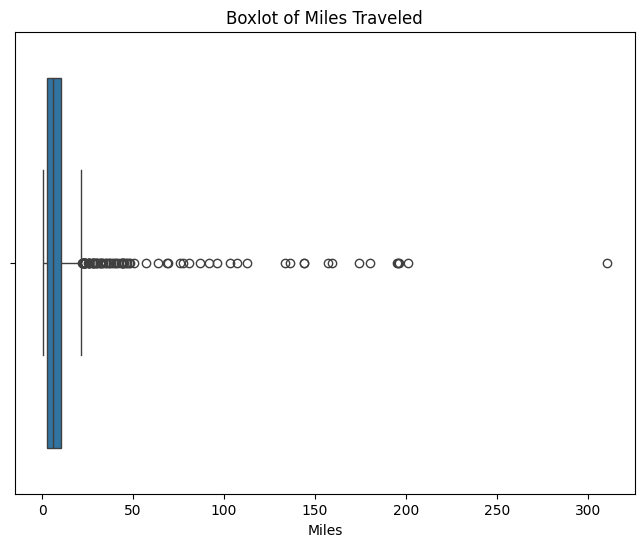

In [13]:
uber_valid = uber_df.iloc[:-1].copy()
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='miles', data=uber_valid)
plt.title('Boxlot of Miles Traveled')
plt.xlabel('Miles')
plt.show()

In [14]:
percentile_90 = uber_df['miles'].quantile(0.90)

# Filter the data to keep only values up to the 90th percentile
uber_df = uber_df[uber_df['miles'] <= percentile_90]

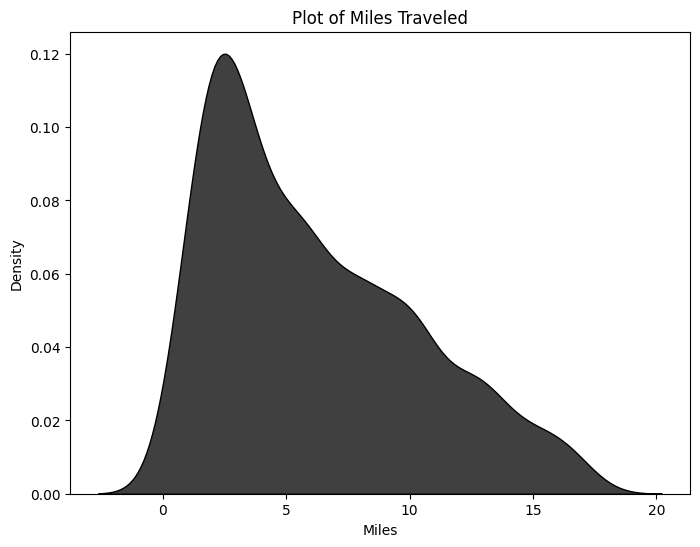

In [15]:
uber_valid = uber_df.iloc[:-1].copy()

plt.figure(figsize=(8, 6))
sns.kdeplot(x=uber_df.miles,color='black',multiple='stack')
plt.title('Plot of Miles Traveled')
plt.xlabel('Miles')
plt.show()

In [16]:
uber_df['start_date'] = pd.to_datetime(uber_df['start_date'],errors='coerce')
uber_df['end_date'] = pd.to_datetime(uber_df['end_date'],errors='coerce')

In [17]:
uber_df['start_time'] = uber_df['start_date'].dt.time
uber_df['end_time'] = uber_df['end_date'].dt.time
uber_df['month'] = uber_df['start_date'].dt.month
uber_df['year'] = uber_df['start_date'].dt.year
uber_df['hour'] = uber_df['start_date'].dt.hour
uber_df['start_date'] =uber_df['start_date'].dt.date
uber_df['end_date'] = uber_df['start_date'].dt.date

In [18]:
def calculate_duration_minutes(start, end):
    start_minutes = start.hour * 60 + start.minute
    end_minutes = end.hour * 60 + end.minute
    duration_minutes = end_minutes - start_minutes
    return duration_minutes


In [19]:
uber_df['duration_minutes'] = uber_df.apply(lambda row: calculate_duration_minutes(row['start_time'], row['end_time']), axis=1)

In [20]:
uber_df

,start_date,end_date,category,start,stop,miles,purpose,start_time,end_time,month,year,hour,duration_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,21:17:00,1,2016,21,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose,01:25:00,01:37:00,1,2016,1,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,20:38:00,1,2016,20,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31:00,17:45:00,1,2016,17,14
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17:15:00,17:19:00,1,2016,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karachi,Karachi,0.8,Customer Visit,23:06:00,23:10:00,12,2016,23,4
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,01:07:00,01:14:00,12,2016,1,7
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,13:24:00,13:42:00,12,2016,13,18
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15:03:00,15:38:00,12,2016,15,35


## **Data Analysis and Visualization**
With a clean and enriched dataset, we moved on to the analysis phase. Here are some of the key findings and visualizations we developed:

* Travel Frequency Over Time:

  We analyzed the number of trips taken each month, identifying peaks and troughs in business travel activities.

* Trip Durations:

  We examined the duration of each trip, providing insights into how long typical business trips lasted.

* Purpose of Travel:

  Understanding the purpose of travel is crucial for optimizing resources. We categorized trips by their stated purposes (e.g., meetings, customer visits, errands).
  
  Visualizations: A pie chart illustrating the proportion of trips by purpose revealed which activities required the most travel.

* Mileage Analysis:

  Analyzing the distance covered provided insights into travel intensity and potential areas for cost savings.
  
  Visualizations: A bar chart of total miles traveled per month showed the fluctuation in travel intensity over the year.

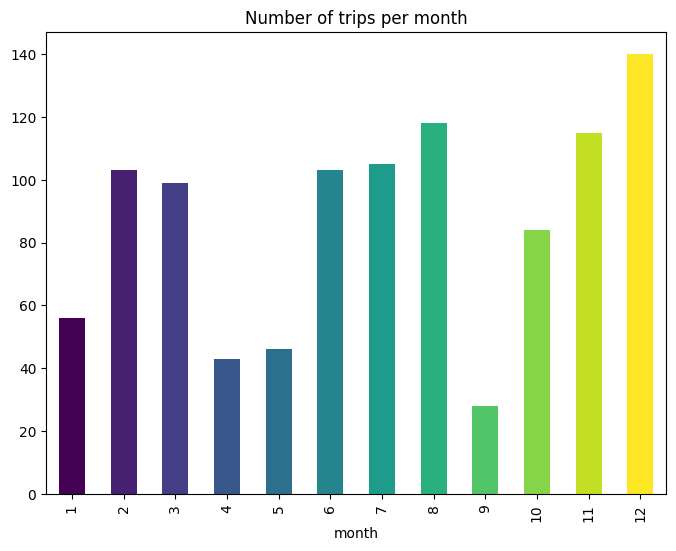

In [21]:
months_sorted = uber_df.sort_values(by='month')
month_category = months_sorted.groupby(['month'])['category'].count()

cmap = plt.get_cmap('viridis')  # Choosing a colormap
colors = cmap(np.linspace(0, 1, len(month_category)))

month_category.plot(kind='bar',figsize=(8,6),title="Number of trips per month", color = colors)
plt.show()

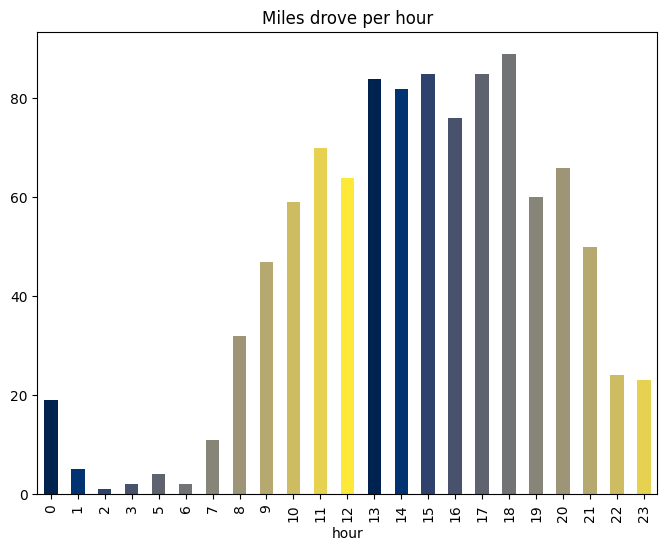

In [22]:
hours_sorted = uber_df.sort_values(by='hour')
hours_category = hours_sorted.groupby(['hour'])['category'].count()

cmap = plt.get_cmap('cividis')  # Choosing a colormap
colors = cmap(np.linspace(0, 1, len(month_category)))

hours_category.plot(kind='bar',figsize=(8,6),title="Miles drove per hour", color = colors)
plt.show()

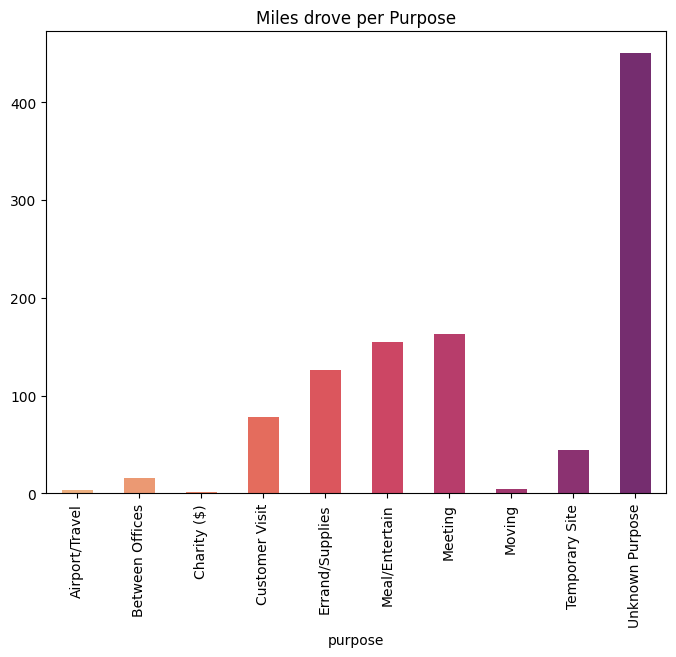

In [23]:
hours_category = uber_df.groupby(['purpose'])['category'].count()

cmap = plt.get_cmap('flare')  # Choosing a colormap
colors = cmap(np.linspace(0, 1, len(month_category)))

hours_category.plot(kind='bar',figsize=(8,6),title="Miles drove per Purpose", color = colors)
plt.show()

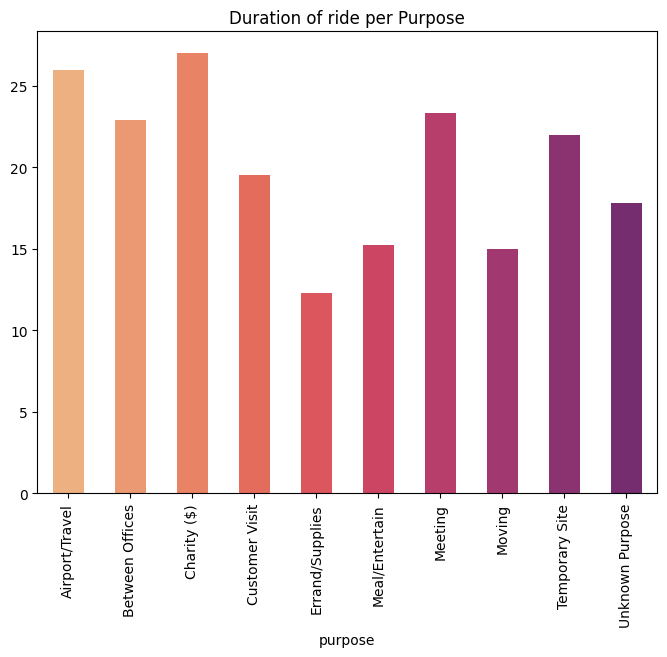

In [44]:
no_negatives = uber_df[uber_df["duration_minutes"] > 0]

cmap = plt.get_cmap('flare')  # Choosing a colormap
colors = cmap(np.linspace(0, 1, len(month_category)))

no_negatives.groupby('purpose')['duration_minutes'].mean().plot(kind='bar',figsize=(8,6),title="Duration of ride per Purpose", color = colors)
plt.show()

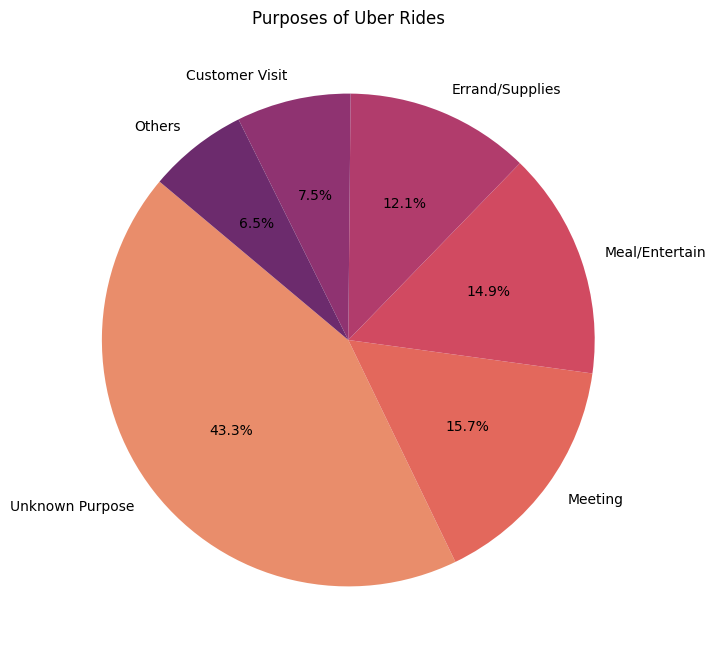

In [26]:
# Count the occurrences of each purpose
purpose_counts = uber_df['purpose'].value_counts()

# Calculate the threshold for "Others"
threshold = 0.06 * purpose_counts.sum()

# Group purposes below the threshold into "Others"
others_count = purpose_counts[purpose_counts < threshold].sum()
main_purposes = purpose_counts[purpose_counts >= threshold]

# Create a new Series for the pie chart
pie_data = pd.concat([main_purposes, pd.Series({'Others': others_count})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10}, colors=sns.color_palette('flare'))
plt.title('Purposes of Uber Rides')
plt.show()

## **Conclusion**
Our analysis of the 2016 business travel dataset revealed several important trends and patterns. We found that travel frequency varied significantly throughout the year, with certain months experiencing higher travel activity. Most trips were relatively short in duration, and the primary purposes for travel included meetings, customer visits, and errands. Geographical analysis highlighted key travel routes and important business hubs.

By understanding these patterns, businesses can better plan and optimize their travel strategies, potentially leading to cost savings and more efficient resource allocation. This analysis not only provides a retrospective view of travel activities but also sets the stage for more informed decision-making in future travel planning.

This comprehensive analysis, combining data preprocessing, feature engineering, and detailed visualization, showcases the power of data storytelling in transforming raw data into actionable insights.